In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
read = pd.read_excel("EastWestAirlines.xls",sheet_name='data', header = 0)
df = read.iloc[:,1:]

In [3]:
print(df.isna().sum())   
print(df.shape)

df.head()


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
(3999, 11)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### non-numeric: cc1_miles,	cc2_miles, cc3_miles, Bonus_trans, Flight_trans_12, Award

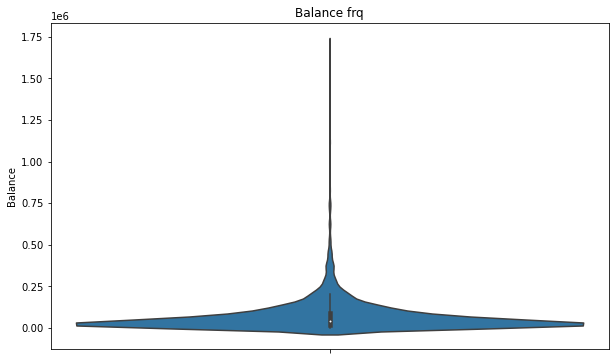

In [4]:
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title("Balance frq")
sns.axes_style("dark")
sns.violinplot(y=df["Balance"])
plt.show()

## i tells that most of the person are in a range, bur some are very high

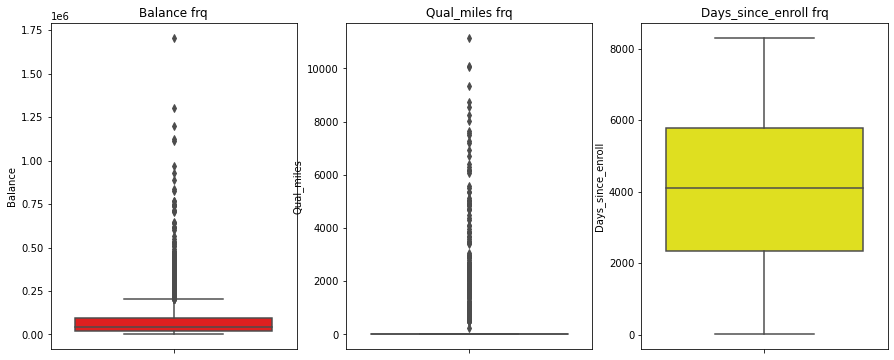

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Balance frq")
sns.boxplot(y=df["Balance"], color="red")
plt.subplot(1,3,2)
plt.title("Qual_miles frq")
sns.boxplot(y=df["Qual_miles"], color = "blue")
plt.subplot(1,3,3)
plt.title("Days_since_enroll frq")
sns.boxplot(y=df["Days_since_enroll"], color = "yellow")
plt.show()

In [6]:
X = np.array(df.iloc[:,:11])
y = np.array(df.iloc[:,10:11])
X

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [7]:
X  = (X-X.min())/(X.max()-X.min())
X

array([[1.65077268e-02, 0.00000000e+00, 5.86565996e-07, ...,
        0.00000000e+00, 4.10596197e-03, 0.00000000e+00],
       [1.12878760e-02, 0.00000000e+00, 5.86565996e-07, ...,
        0.00000000e+00, 4.08719186e-03, 0.00000000e+00],
       [2.42568502e-02, 0.00000000e+00, 5.86565996e-07, ...,
        0.00000000e+00, 4.12590522e-03, 0.00000000e+00],
       ...,
       [4.31694976e-02, 0.00000000e+00, 1.75969799e-06, ...,
        0.00000000e+00, 8.22365527e-04, 5.86565996e-07],
       [3.22018866e-02, 0.00000000e+00, 5.86565996e-07, ...,
        5.86565996e-07, 8.21778961e-04, 0.00000000e+00],
       [1.76908304e-03, 0.00000000e+00, 5.86565996e-07, ...,
        0.00000000e+00, 8.20019263e-04, 0.00000000e+00]])

In [8]:
def ktests(n):
    #Set number of clusters at initialisation time
    k_means = KMeans(n_clusters=n)
    #Run the clustering algorithm
    model = k_means.fit(X)
    #Generate cluster predictions and store in y_hat
    y_hat = k_means.predict(X)
    labels = k_means.labels_
    score = davies_bouldin_score(X, labels)
    print('Score with k=',n,' is ', score)

In [9]:
for a in range(2,7):
    ktests(a)
## the lowest is k=4 whcih is the best

Score with k= 2  is  0.6322390890026532
Score with k= 3  is  0.6301069777945213
Score with k= 4  is  0.6208170916745357
Score with k= 5  is  0.6597292315301997
Score with k= 6  is  0.645032586816341


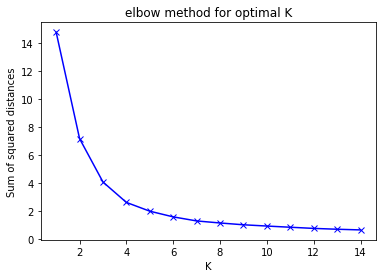

In [10]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('elbow method for optimal K')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

predict = kmeans.fit_predict(X)
kmeans.cluster_centers_
#centers

array([[1.81876781e-02, 5.96101347e-05, 9.78792867e-07, 5.96168144e-07,
        5.89488389e-07, 5.92967686e-03, 5.47238938e-06, 1.70224375e-04,
        5.18098506e-07, 2.22048691e-03, 1.89955536e-07],
       [1.89466594e-01, 1.97818590e-04, 1.84530492e-06, 5.96077877e-07,
        5.86565996e-07, 2.56001561e-02, 1.09006157e-05, 7.52760752e-04,
        2.27651019e-06, 3.24522552e-03, 3.67792733e-07],
       [7.52968202e-02, 1.28963551e-04, 1.72611139e-06, 5.91963843e-07,
        6.05758340e-07, 1.83398867e-02, 9.68673559e-06, 4.43149411e-04,
        1.26669467e-06, 2.78354954e-03, 2.59696397e-07],
       [4.94076405e-01, 3.00727874e-04, 1.96274006e-06, 5.86565996e-07,
        6.54246688e-07, 3.39018677e-02, 1.33330963e-05, 1.08273315e-03,
        4.08340174e-06, 3.79097603e-03, 4.96325074e-07]])

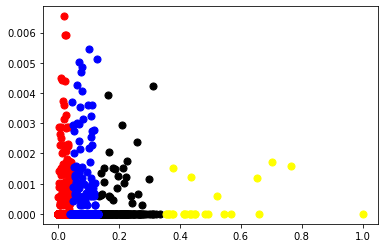

In [12]:
#plot
plt.scatter(X[predict == 0,0], X[predict == 0,1], s=50, c='red')
plt.scatter(X[predict == 1,0], X[predict == 1,1], s=50, c='black')
plt.scatter(X[predict == 2,0], X[predict == 2,1], s=50, c='blue')
plt.scatter(X[predict == 3,0], X[predict == 3,1], s=50, c='yellow')

In [20]:
df2 = pd.DataFrame(data=X, columns=df.columns)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000102,5.865660e-07,0.000000,0.000000e+00,0.004106,0.000000e+00
1,0.011288,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000126,1.173132e-06,0.000000,0.000000e+00,0.004087,0.000000e+00
2,0.024257,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.002418,2.346264e-06,0.000000,0.000000e+00,0.004126,0.000000e+00
3,0.008667,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000293,5.865660e-07,0.000000,0.000000e+00,0.004078,0.000000e+00
4,0.057338,0.0,2.346264e-06,5.865660e-07,5.865660e-07,0.025398,1.525072e-05,0.001218,2.346264e-06,0.004068,5.865660e-07
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.005000,2.346264e-06,0.000117,5.865660e-07,0.000823,5.865660e-07
3995,0.037766,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000575,2.932830e-06,0.000000,0.000000e+00,0.000818,5.865660e-07
3996,0.043169,0.0,1.759698e-06,5.865660e-07,5.865660e-07,0.014926,4.692528e-06,0.000000,0.000000e+00,0.000822,5.865660e-07
3997,0.032202,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000293,5.865660e-07,0.000293,5.865660e-07,0.000822,0.000000e+00


In [21]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=4)
#Run the clustering algorithm
model = k_means.fit(df2)
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(df2)
labels = k_means.labels_
df2['clusters'] = labels
score = davies_bouldin_score(X, labels)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,0.016508,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000102,5.865660e-07,0.000000,0.000000e+00,0.004106,0.000000e+00,1
1,0.011288,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000126,1.173132e-06,0.000000,0.000000e+00,0.004087,0.000000e+00,1
2,0.024257,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.002418,2.346264e-06,0.000000,0.000000e+00,0.004126,0.000000e+00,1
3,0.008667,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000293,5.865660e-07,0.000000,0.000000e+00,0.004078,0.000000e+00,1
4,0.057338,0.0,2.346264e-06,5.865660e-07,5.865660e-07,0.025398,1.525072e-05,0.001218,2.346264e-06,0.004068,5.865660e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.005000,2.346264e-06,0.000117,5.865660e-07,0.000823,5.865660e-07,1
3995,0.037766,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000575,2.932830e-06,0.000000,0.000000e+00,0.000818,5.865660e-07,1
3996,0.043169,0.0,1.759698e-06,5.865660e-07,5.865660e-07,0.014926,4.692528e-06,0.000000,0.000000e+00,0.000822,5.865660e-07,1
3997,0.032202,0.0,5.865660e-07,5.865660e-07,5.865660e-07,0.000293,5.865660e-07,0.000293,5.865660e-07,0.000822,0.000000e+00,1


c:\users\zmtyo\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


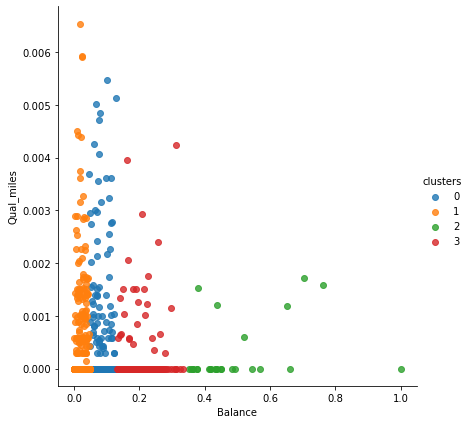

In [22]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles',  data=df2,
        hue = 'clusters',
        fit_reg=False, size = 6 );

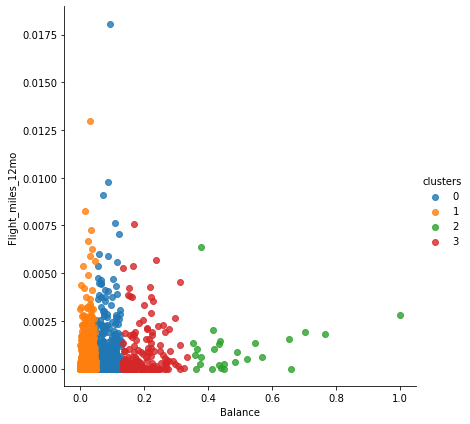

In [23]:
sns.lmplot( 'Balance','Flight_miles_12mo',  data=df2,
        hue = 'clusters',
        fit_reg=False, size = 6 );

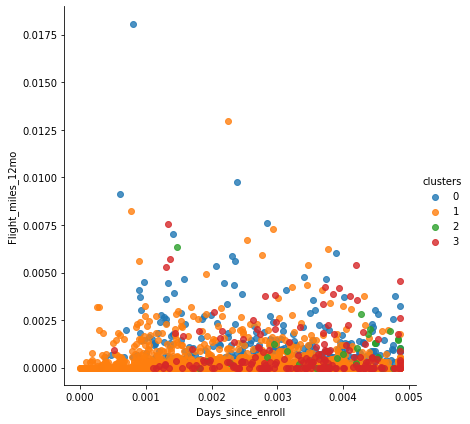

In [24]:
# Plot between pairs Days_since_enroll~Bonus_miles
sns.lmplot( 'Days_since_enroll','Flight_miles_12mo',  data=df2,
        hue = 'clusters',
        fit_reg=False, size = 6 );

In [27]:
print(df2.loc[df2['clusters'] == 0]['Balance'].max())
print(df2.loc[df2['clusters'] == 1]['Balance'].max())
print(df2.loc[df2['clusters'] == 3]['Balance'].max())
print(df2.loc[df2['clusters'] == 2]['Balance'].max())

0.13236741555502635
0.04840811854264159
0.33327154838172307
1.0


According the polt upper and max values, the group is mainly separete by balance and the order is 0,1,3,2